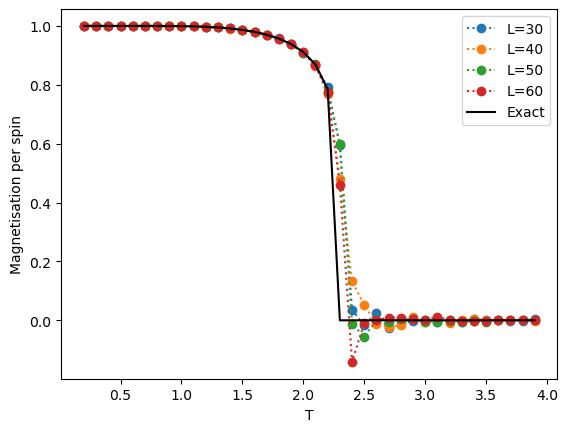

In [5]:
%reset -f

#Question 3(b)(i) - adpating code from CS example 3

import numpy as np
import matplotlib.pyplot as plt
from numba import njit

@njit
def metropolis_sweep_ising_2D(spins, T): #function from CS example 3
    """
    This function performs a Monte Carlo sweep on a 2D system of N spins,
    assuming B=0.
    """
    L = spins.shape[0]
    for i in np.random.permutation(L):
        for j in np.random.permutation(L):
            DeltaE = 2 * spins[i, j] * (spins[i - 1, j] + spins[(i + 1) % L, j] +
                                        spins[i, j - 1] + spins[i, (j + 1) % L])
            if np.exp(-DeltaE / T) > np.random.random():
                spins[i, j] = -spins[i, j]

@njit
def magnetic_moment_ising_2D(spins): #function from CS example 3, adding N
    """ 
    The total magnetisation of the system is obtained by
    implementing equation (10) in Unit 10IM
    """
    S = 0.0
    for i in range(spins.shape[0]):
        for j in range(spins.shape[0]):
            S += spins[i, j]
    return S 


#Simulation parameters
relax_sweeps = 500
sweeps = 2000
L = [30, 40, 50, 60] #size of lattice L x L
temperatures = np.arange(0.2, 4.0, 0.1)

for size in L: #loop over different lattice sizes
    N = size * size #number of spins
    magnetisation_T = []

    for T in temperatures:
        spins = np.ones((size, size))
        magnetic_moment_sweep = []
        
        #Monte Carlo sweep
        for sweep in range(sweeps + relax_sweeps):
            metropolis_sweep_ising_2D(spins, T)
            
            if sweep >= relax_sweeps:
                magnetic_moment_sweep.append(magnetic_moment_ising_2D(spins) / N)
        

        magnetisation_T.append(np.mean(magnetic_moment_sweep))

    #plotting magnetisation per spin vs temp for each lattice size    
    plt.plot(temperatures, magnetisation_T, ":o", label=f'L={size}')

    
#Question 3(b)(ii) 
#Mathematically exact magnetisation function

def exact_magnetisation(T):
    Tc = 2.0 / (np.log(1.0 + np.sqrt(2.0)))
    if T <= Tc:
        return (1 - np.sinh(2 / T)**-4)**(1/8)
    else:
        return 0.0

exact_temperatures = np.arange(0.2, 4.0, 0.1)
exact_magnetisation_values = [exact_magnetisation(T) for T in exact_temperatures]

#Plotting exact magnetisation values
plt.plot(exact_temperatures, exact_magnetisation_values, "-", color='k', label='Exact')
plt.xlabel('T')
plt.ylabel('Magnetisation per spin')
plt.legend();    

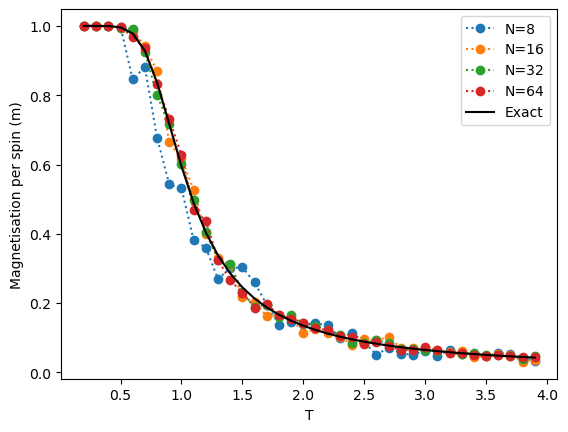

In [6]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from numba import njit

#Question 3(c)(ii)
#adapting code from CS example 3, adapting to make suitable for 1D model

@njit  #from 
def metropolis_sweep_ising_1D(spins, T, B):
    """
    This function performs a Monte Carlo sweep on a 1D system of N spins
    """
    N = len(spins)
    for i in np.random.permutation(N):  # Spins are selected in random order
        DeltaE = 2 * spins[i] * (spins[i - 1] + spins[(i + 1) % N] + B) #Using equation from (b)(i)

        if np.exp(-DeltaE / T) > np.random.random():  # Metropolis-Hastings step
            spins[i] = -spins[i]

@njit
def magnetic_moment_ising_1D(spins):
    """ 
    The total magnetisation of the system is obtained by
    implementing equation (10) in Unit 10IM
    """
    S = 0.0
    for i in range(len(spins)):
        S += spins[i]
    return S


relax_sweeps = 500
sweeps = 2000

sizes = [8, 16, 32, 64] #Lattice sizes
temperatures = np.arange(0.2, 4.0, 0.1) #temperature range
B = 0.1 #external magnetic field



for N in sizes:
    magnetisation_T = []
    for T in temperatures:
        spins = np.ones(N)
        magnetic_moment_sweep = []
        for sweep in range(sweeps + relax_sweeps):
            metropolis_sweep_ising_1D(spins, T, B)

            magnetic_moment_sweep.append(magnetic_moment_ising_1D(spins) / N)

        magnetisation_T.append(np.mean(magnetic_moment_sweep[relax_sweeps:]))
    

    plt.plot(temperatures, magnetisation_T, ":o", label=f'N={N}')

#Implementing exact function from question
def Exact_magnetisation(T, B):
    beta = 1 / T
    denominator = (np.cosh(beta * B))**2 - 2 * np.exp(-2 * beta) * np.sinh(2 * beta)
    return np.sinh(beta * B) / np.sqrt(denominator)
    
#Plot exact magnetisation
exact_magnetisation_T = [Exact_magnetisation(T, B) for T in temperatures]
plt.plot(temperatures, exact_magnetisation_T, 'k-', label = 'Exact')
plt.xlabel('T')
plt.ylabel('Magnetisation per spin (m)')
plt.legend(); 
        


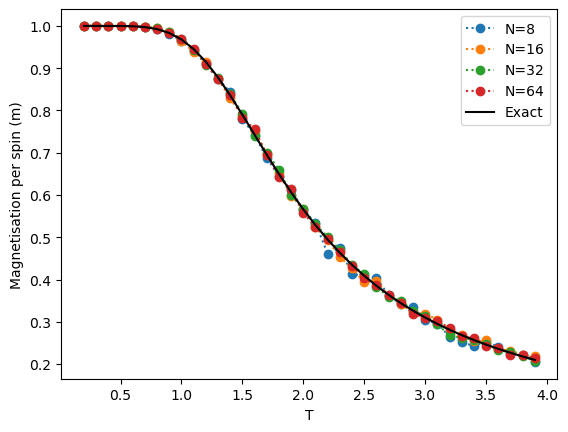

In [4]:
#Question 3(c)(ii) when B = 0.5

B = 0.5 #external magnetic field



for N in sizes:
    magnetisation_T = []
    for T in temperatures:
        spins = np.ones(N)
        magnetic_moment_sweep = []
        for sweep in range(sweeps + relax_sweeps):
            metropolis_sweep_ising_1D(spins, T, B)

            magnetic_moment_sweep.append(magnetic_moment_ising_1D(spins) / N)

        magnetisation_T.append(np.mean(magnetic_moment_sweep[relax_sweeps:]))
    

    plt.plot(temperatures, magnetisation_T, ":o", label=f'N={N}')
    
#Implementing exact function from question
def Exact_magnetisation(T, B):
    beta = 1 / T
    denominator = (np.cosh(beta * B))**2 - 2 * np.exp(-2 * beta) * np.sinh(2 * beta)
    return np.sinh(beta * B) / np.sqrt(denominator)
    
#Plot exact magnetisation
exact_magnetisation_T = [Exact_magnetisation(T, B) for T in temperatures]
plt.plot(temperatures, exact_magnetisation_T, 'k-', label = 'Exact')
plt.xlabel('T')
plt.ylabel('Magnetisation per spin (m)')
plt.legend();


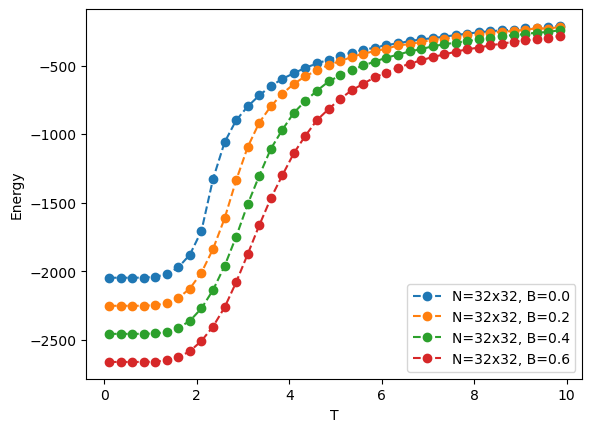

In [5]:
%reset -f

#Question 3(d)(ii)

import numpy as np
import matplotlib.pyplot as plt
from numba import njit

#adapting code for mean total energy on CS

@njit
def metropolis_sweep_ising_2D(spins, T, B):
    """
    This function performs a Monte Carlo sweep on a 2D system of N spins,
    including the external megnatic field B.
    """
    L = spins.shape[0]
    for i in np.random.permutation(L):
        for j in np.random.permutation(L):
            DeltaE = 2 * spins[i, j] * (spins[i - 1, j] + spins[(i + 1) % L, j] +
                                        spins[i, j - 1] + spins[i, (j + 1) % L] + B)
            if np.exp(-DeltaE / T) > np.random.random():
                spins[i, j] = -spins[i, j]


@njit
def energy_ising_2D(spins, B):
    """
    The energy of the 2D Ising model is calculated from equation (16)
    in Unit 10IM, including the external magnetic field B.
    """
    L = spins.shape[0]
    E = 0.0
    for i in range(L):
        for j in range(L):
            E += -spins[i, j] * (spins[i - 1, j] + spins[i, j - 1]) - B * spins[i, j]
    return E


L = 32 #lattice size
relax_sweeps = 500
sweeps = 1000

temperatures = np.arange(0.1, 10, 0.25)
B_values = [0.0, 0.2, 0.4, 0.6] #external magnetic field

N = L * L

#Looping over different external magnetic field values
for B in B_values:
    energies_T = []
    spins = np.ones((L, L))  # spins are initiated in the +1 state
    #Looping over temperatures
    for T in temperatures:
        energies_sweep = []
        #Monte Carlo sweeps
        for sweep in range(sweeps + relax_sweeps):
            metropolis_sweep_ising_2D(spins, T, B)
            E = energy_ising_2D(spins, B)
            energies_sweep.append(E)
        energies_T.append(np.mean(energies_sweep[relax_sweeps:]))
    #plotting mesn total energy vs temperature for each magnetic field value
    plt.plot(temperatures, energies_T, "--o", label=f'N={L}x{L}, B={B}')

plt.xlabel('T')
plt.ylabel('Energy')
plt.legend();

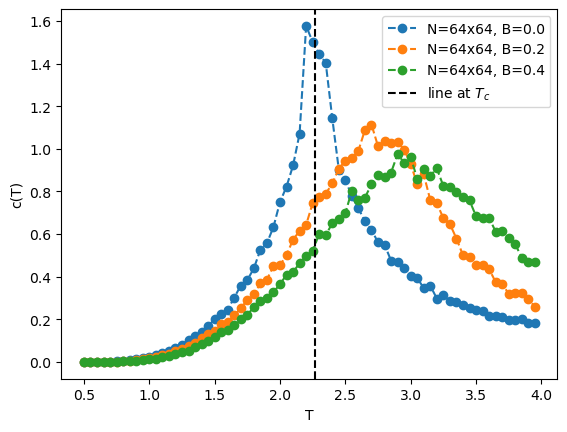

In [6]:
#Question 3(iii)

#adapting code from CS exercise 3

L = 64 #lattice size
relax_sweeps = 500
sweeps = 2000

Tc = 2.0 / (np.log(1.0 + np.sqrt(2.0))) #critical temperature

temperatures = np.arange(0.5, 4.0, 0.05)

B_values = [0.0, 0.2, 0.4] #external magnetic field values

N = L * L

#Loop over different external magnetic field values
for B in B_values:
    specific_heat_T = []
    spins = np.ones((L, L))
    
    #Loop over temperatures
    for T in temperatures:
        energy_sweep = []
        
        #Monte Carlo sweeps
        for sweep in range(sweeps + relax_sweeps):

            metropolis_sweep_ising_2D(spins, T, B)

            if sweep > relax_sweeps:
                E = energy_ising_2D(spins, B)
                energy_sweep = np.append(energy_sweep, E)

        meanE = np.mean(energy_sweep)  # Mean energy
        meanE2 = np.mean(energy_sweep ** 2)  # Mean square energy
        
        # Specific heat is calculated
        specific_heat_T.append((meanE2 - meanE ** 2) / (N * T ** 2))
    
    #Plot specific heat capacity vs temperature for each external magnetic field value
    plt.plot(temperatures, specific_heat_T, "--o", label=f'N={L}x{L}, B={B}')

plt.xlabel('T')
plt.ylabel('c(T)')
plt.axvline(Tc, c='k', ls='--', label=r'line at $T_c$')
plt.legend();

In [1]:
#Question 3(e)(i)

%reset -f
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

@njit
def metropolis_sweep_ising_3D(spins, T, B):
    """
    This function performs a Monte Carlo sweep on a 3D system of N spins,
    assuming a magnetic field B.
    """
    L = spins.shape[0]
    for i in np.random.permutation(L):
        for j in np.random.permutation(L):
            for k in np.random.permutation(L):
                DeltaE = 2 * spins[i, j, k] * (spins[i - 1, j, k] + spins[(i + 1) % L, j, k] +
                                                spins[i, j - 1, k] + spins[i, (j + 1) % L, k] +
                                                spins[i, j, k - 1] + spins[i, j, (k + 1) % L] + B)
                if np.exp(-DeltaE / T) > np.random.random():
                    spins[i, j, k] = -spins[i, j, k]

@njit
def total_magnetisation_3D(spins):
    """ 
    The total magnetisation of the system is obtained by
    implementing equation (10) in Unit 10IM
    """
    S = 0.0
    for i in range(spins.shape[0]):
        for j in range(spins.shape[0]):
            for k in range(spins.shape[0]):
                S += spins[i, j, k]
    return S

L = 35  # Lattice size to simulate

B = 0 #external magenetic field set to zero

relax_sweeps = 400
sweeps = 2000

temperatures = np.arange(4.0, 5.0, 0.1) #temperature range



CPU times: total: 2min 7s
Wall time: 2min 9s


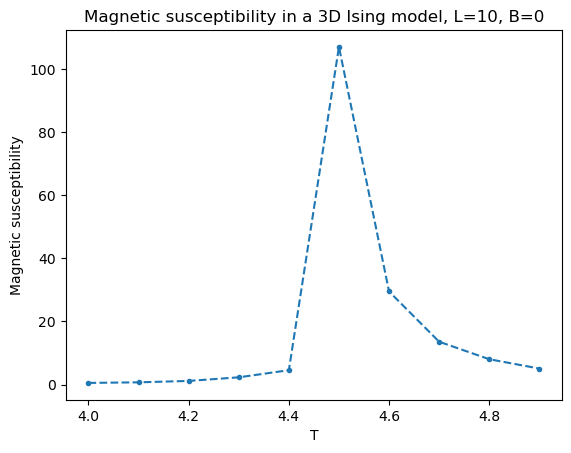

In [2]:
%%time

magnetic_susceptibility_T = []

#loop over temperatures
for T in temperatures:
    spins = np.ones((L, L, L))
    total_magnetisation_sweep = []
    total_magnetisation_sqd_sweep = []
    
    #monte carlo sweeps
    for sweep in range(sweeps + relax_sweeps):
        metropolis_sweep_ising_3D(spins, T, B)
        total_magnetisation_sweep.append(total_magnetisation_3D(spins))
        total_magnetisation_sqd_sweep.append(total_magnetisation_3D(spins)**2)
    
    #calculate magnetic susceptibility
    magnetic_susceptibility_T.append((np.mean(total_magnetisation_sqd_sweep[relax_sweeps:])
                                      - np.mean(total_magnetisation_sweep[relax_sweeps:])**2)/(T*L*L*L))

#Plotting
plt.plot(temperatures, magnetic_susceptibility_T, "--.")
plt.xlabel('T')
plt.ylabel('Magnetic susceptibility')
plt.title('Magnetic susceptibility in a 3D Ising model, L=10, B=0');

CPU times: total: 2min 25s
Wall time: 2min 26s


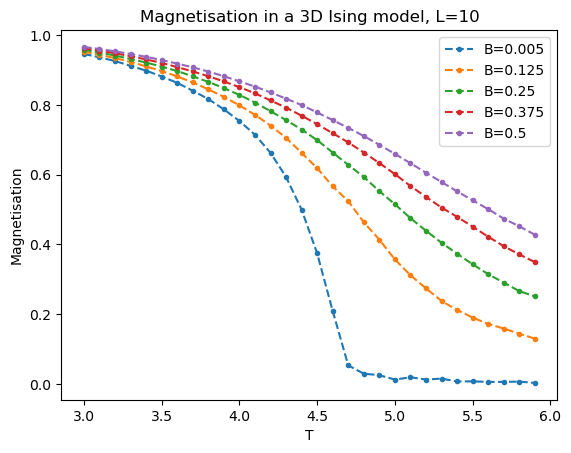

In [4]:
%%time
#Question 3(e)(ii)


L = 15  # Lattice size to simulate
B_values = [0.005, 0.125, 0.250, 0.375, 0.5] # list of magnetic field values within range 0.005 to 0.5
relax_sweeps = 400
sweeps = 2000
temperatures = np.arange(3.0, 6.0, 0.1)

for B in B_values:
    magnetisation_T = []
    
    for T in temperatures:
        spins = np.ones((L, L, L))
        total_magnetisation_sweep = []
            
        for sweep in range(sweeps + relax_sweeps):
            metropolis_sweep_ising_3D(spins, T, B)
            total_magnetisation_sweep.append(total_magnetisation_3D(spins) / (L*L*L))

    
        magnetisation_T.append(np.mean(total_magnetisation_sweep[relax_sweeps:]))
    
    plt.plot(temperatures, magnetisation_T, "--.", label=f'B={B}')
    

plt.xlabel('T')
plt.ylabel('Magnetisation')
plt.title('Magnetisation in a 3D Ising model, L=10')
plt.legend();